In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [40]:
DIR_NFL = 'data/nfl-health-and-safety-helmet-assignment/'
EXAMPLE_IMG_PATH = DIR_NFL + 'images/57502_001570_Sideline_frame1395.jpg'
EXAMPLE_IMG_PATH = DIR_NFL + 'images/57503_001581_Endzone_frame327.jpg'

In [41]:
def path_to_img(img_path):
    img = cv2.imread(img_path)
    return img


def show_image(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [80]:
img = path_to_img(EXAMPLE_IMG_PATH)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hls_img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

In [43]:
bgr_lower_color = np.array([200,200,200])
bgr_upper_color = np.array([255,255,255])

hsv_lower_color = np.array([0,0,0])
hsv_upper_color = np.array([180,60,255])

hls_lower_color = np.array([0,160,0])
hls_upper_color = np.array([180,255,255])

In [44]:
bgr_mask = cv2.inRange(img, bgr_lower_color, bgr_upper_color)

hsv_mask = cv2.inRange(hsv_img, hsv_lower_color, hsv_upper_color)

hls_mask = cv2.inRange(hls_img, hls_lower_color, hls_upper_color)

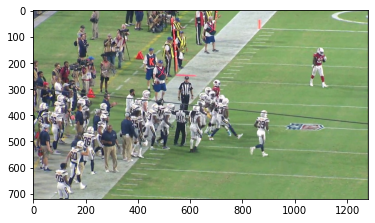

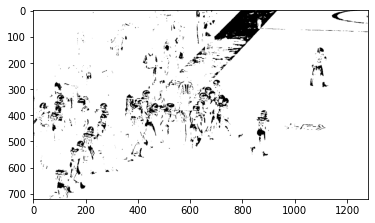

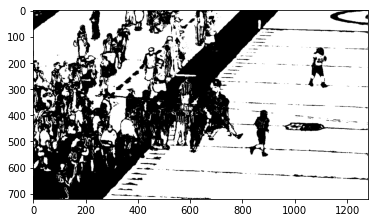

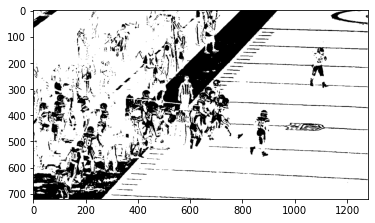

In [52]:
show_image(img)
show_image(~bgr_mask)
show_image(~hsv_mask)
show_image(~hls_mask)

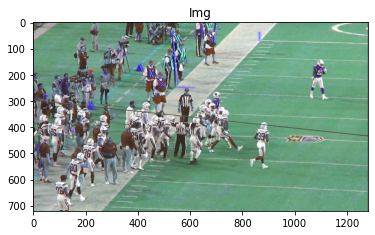

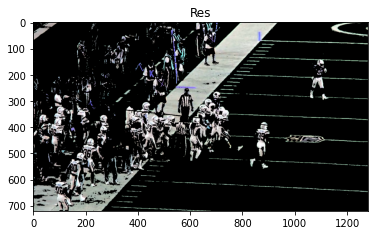

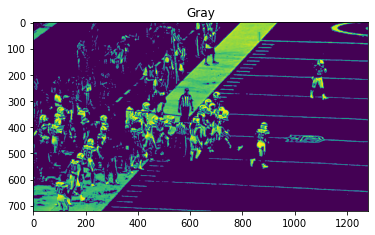

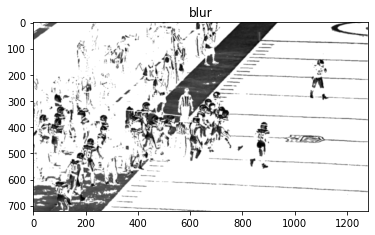

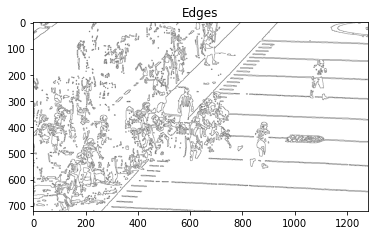

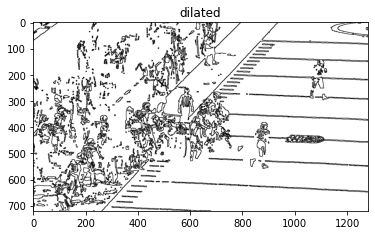

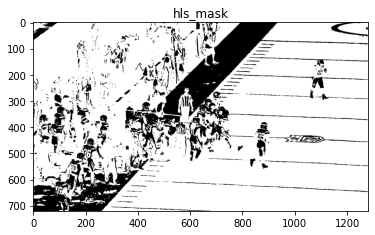

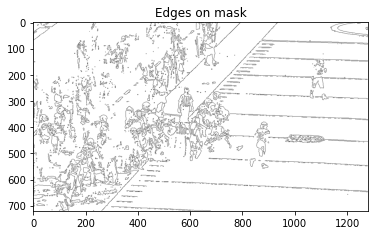

In [212]:
img = path_to_img(EXAMPLE_IMG_PATH)

plt.imshow(img)
plt.title("Img")
plt.show()

res = cv2.bitwise_and(img,img, mask= hls_mask)
plt.imshow(res)
plt.title("Res")
plt.show()

gray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.title("Gray")
plt.show()

kernel_size = 5
blur = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
plt.imshow(~blur, cmap="gray")
plt.title("blur")
plt.show() 

low_threshold = 10
high_threshold = 200
edges = cv2.Canny(blur, low_threshold, high_threshold)
plt.imshow(~edges, cmap="gray")
plt.title("Edges")
plt.show() 

dilated = cv2.dilate(edges, np.ones((2,2), dtype=np.uint8))
plt.imshow(~dilated, cmap="gray")
plt.title("dilated")
plt.show() 


plt.imshow(~hls_mask, cmap="gray")
plt.title("hls_mask")
plt.show() 

edges2 = cv2.Canny(hls_mask, 100, 200, apertureSize = 3)
plt.imshow(~edges2, cmap="gray")
plt.title("Edges on mask")
plt.show() 


#### Canny transformation

https://medium.com/@nikatsanka/comparing-edge-detection-methods-638a2919476e

#### Hough transformation

https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html

In [234]:
minLineLength = 100
maxLineGap = 5
#lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength, maxLineGap)
h, theta = cv2.HoughLines(dilated, 1, np.pi/180, 500)

# Green color in BGR 
LINE_COLOR = (255, 0, 0) 
"""
for l in lines:
    for x1, y1, x2, y2 in l:
        # cv2.line(image, start_point, end_point, color, thickness)
        cv2.line(img, (x1,y1), (x2,y2), LINE_COLOR, 3)


plt.imshow(img)
plt.title('Hough Lines')
plt.show()
"""

"\nfor l in lines:\n    for x1, y1, x2, y2 in l:\n        # cv2.line(image, start_point, end_point, color, thickness)\n        cv2.line(img, (x1,y1), (x2,y2), LINE_COLOR, 3)\n\n\nplt.imshow(img)\nplt.title('Hough Lines')\nplt.show()\n"

In [235]:
len(lines)

17

In [236]:
img = path_to_img(EXAMPLE_IMG_PATH)
for l in lines:
    for r,theta in l:
        
        # Stores the value of cos(theta) in a
        a = np.cos(theta)
    
        # Stores the value of sin(theta) in b
        b = np.sin(theta)
        
        # x0 stores the value rcos(theta)
        x0 = a*r
        
        # y0 stores the value rsin(theta)
        y0 = b*r
        
        # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
        x1 = int(x0 + 10000*(-b))
        
        # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
        y1 = int(y0 + 10000*(a))
    
        # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
        x2 = int(x0 - 10000*(-b))
        
        # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
        y2 = int(y0 - 10000*(a))
        
        # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
        # (0,0,255) denotes the colour of the line to be 
        #drawn. In this case, it is red. 
        cv2.line(img,(x1,y1), (x2,y2), LINE_COLOR,5)


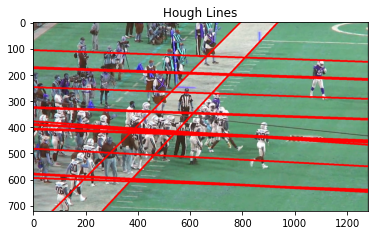

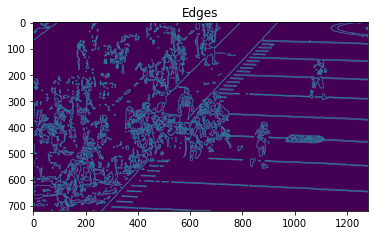

In [237]:
plt.imshow(img)
plt.title('Hough Lines')
plt.show()

plt.imshow(edges)
plt.title('Edges')
plt.show()

In [184]:
len(lines[:, 0])

2113

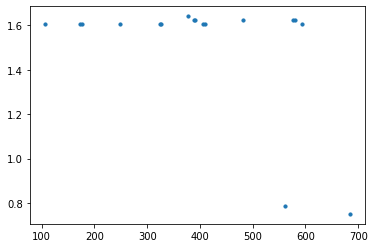

In [238]:
plt.scatter(lines[:, 0, 0], lines[:, 0, 1], s=10)

In [143]:
lines[:, 0].T.shape

(2, 15)

In [192]:
lines[:, 0, 0]

array([579., 324., 561., 326., 577., 390., 684., 173., 175., 106., 497.,
       388., 408., 104., 481., 247., 392., 308., 410., 367., 345., 347.,
       325., 358., 499., 420., 591., 520., 363., 345.,  38., 322., 430.,
       518., 306., 379., 307., 695., 343., 434., 432., 376., 412., 365.,
       395., 361., 229., 310., 423., 597., 595., 455., 352.,  58., 349.,
        56., 686., 341., 681., 329., 305., 513., 436., 515., 310., 428.,
       354.], dtype=float32)

#lines: 297


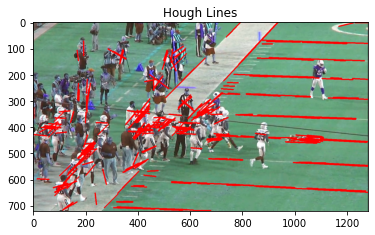

In [226]:
minLineLength = 40#100
maxLineGap = 5#5

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 20, minLineLength, maxLineGap)


rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 50 # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40  # minimum number of pixels making up a line
max_line_gap = 5  # maximum gap in pixels between connectable line segments

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments

lines = cv2.HoughLinesP(dilated, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)






# Green color in BGR 
LINE_COLOR = (255, 0, 0) 

print('#lines:', len(lines))
img = path_to_img(EXAMPLE_IMG_PATH)
for l in lines:
    for x1, y1, x2, y2 in l:
        # cv2.line(image, start_point, end_point, color, thickness)
        cv2.line(img, (x1,y1), (x2,y2), LINE_COLOR, 3)


plt.imshow(img)
plt.title('Hough Lines')
plt.show()


In [217]:
len(lines)

1360

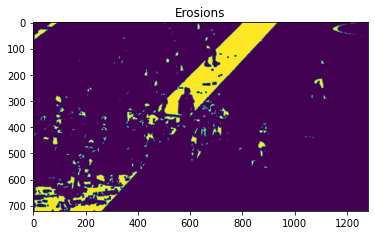

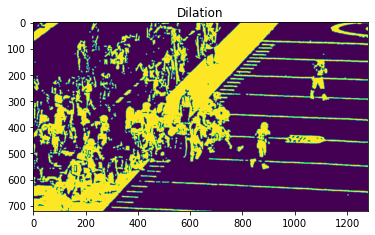

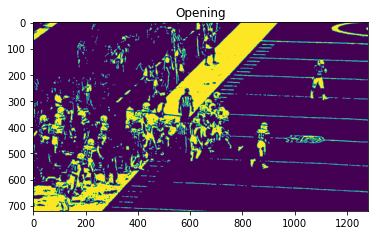

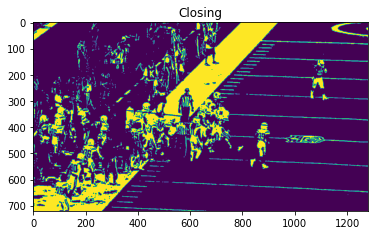

In [207]:
# Erosion
kernel = np.ones((2,2),np.uint8)
erosions2 = cv2.erode(hls_mask, kernel, iterations = 5)
plt.imshow(erosions2)
plt.title('Erosions')
plt.show()

# Dilation
dilation = cv2.dilate(hls_mask, kernel, iterations = 3)
plt.imshow(dilation)
plt.title('Dilation')
plt.show()

# Opening
opening = cv2.morphologyEx(hls_mask, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)
plt.title('Opening')
plt.show()

# Closing
closing = cv2.morphologyEx(hls_mask, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)
plt.title('Closing')
plt.show()

In [ ]:
def houg_line_to_polar(line):
    x1, y1, x2, y2 = line
    theta = np.arctan(-(x2-x1)/(y2-y1))
    rho = x1 * np.cos(theta) + y1 * np.sen(theta)
    return rho, theta

def 


In [241]:
from skimage.transform import hough_line, hough_line_peaks
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(dilated, theta=tested_angles)

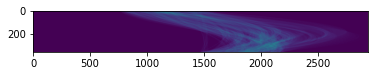

In [247]:
plt.imshow(h.T)

In [263]:
t_hough = 700

#h_2 = h[(h>t_hough).astype(int)]

#plt.imshow(h_2)

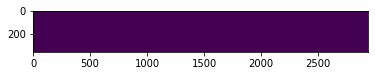

In [265]:
plt.imshow((h>t_hough).astype(int).T)
plt.show()

In [266]:
(h>t_hough).astype(int).sum().sum()

4